In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df_original = pd.read_csv("/content/drive/My Drive/bank-full.csv")

In [6]:
df_bank.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


We should transform yes-no to 0-1 to make it numerical. Also some columns have unknown as their value. Unknown features might badly effect the model so there might be something done later to increase accuracy.

In [7]:
df_bank["default"] = df_bank["default"].replace({"yes": 1, "no": 0})
df_bank["housing"] = df_bank["housing"].replace({"yes": 1, "no": 0})
df_bank["loan"] = df_bank["loan"].replace({"yes": 1, "no": 0})
df_bank["y"] = df_bank["y"].replace({"yes": 1, "no": 0})

In [8]:
print('Number of YES:', len(df_bank[df_bank['y']==1]))
print('Number of NO:', len(df_bank[df_bank['y']==0]))

Number of YES: 5289
Number of NO: 39922


The data is highly imbalanced, there are much more NO than YES in the response variable. This might reduce the accuracy of the model.

In [9]:
df_bank.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0


In [10]:
df_bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [11]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

There are a lot of categorical features, they need to be encoded or removed in ordxer to create a model.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

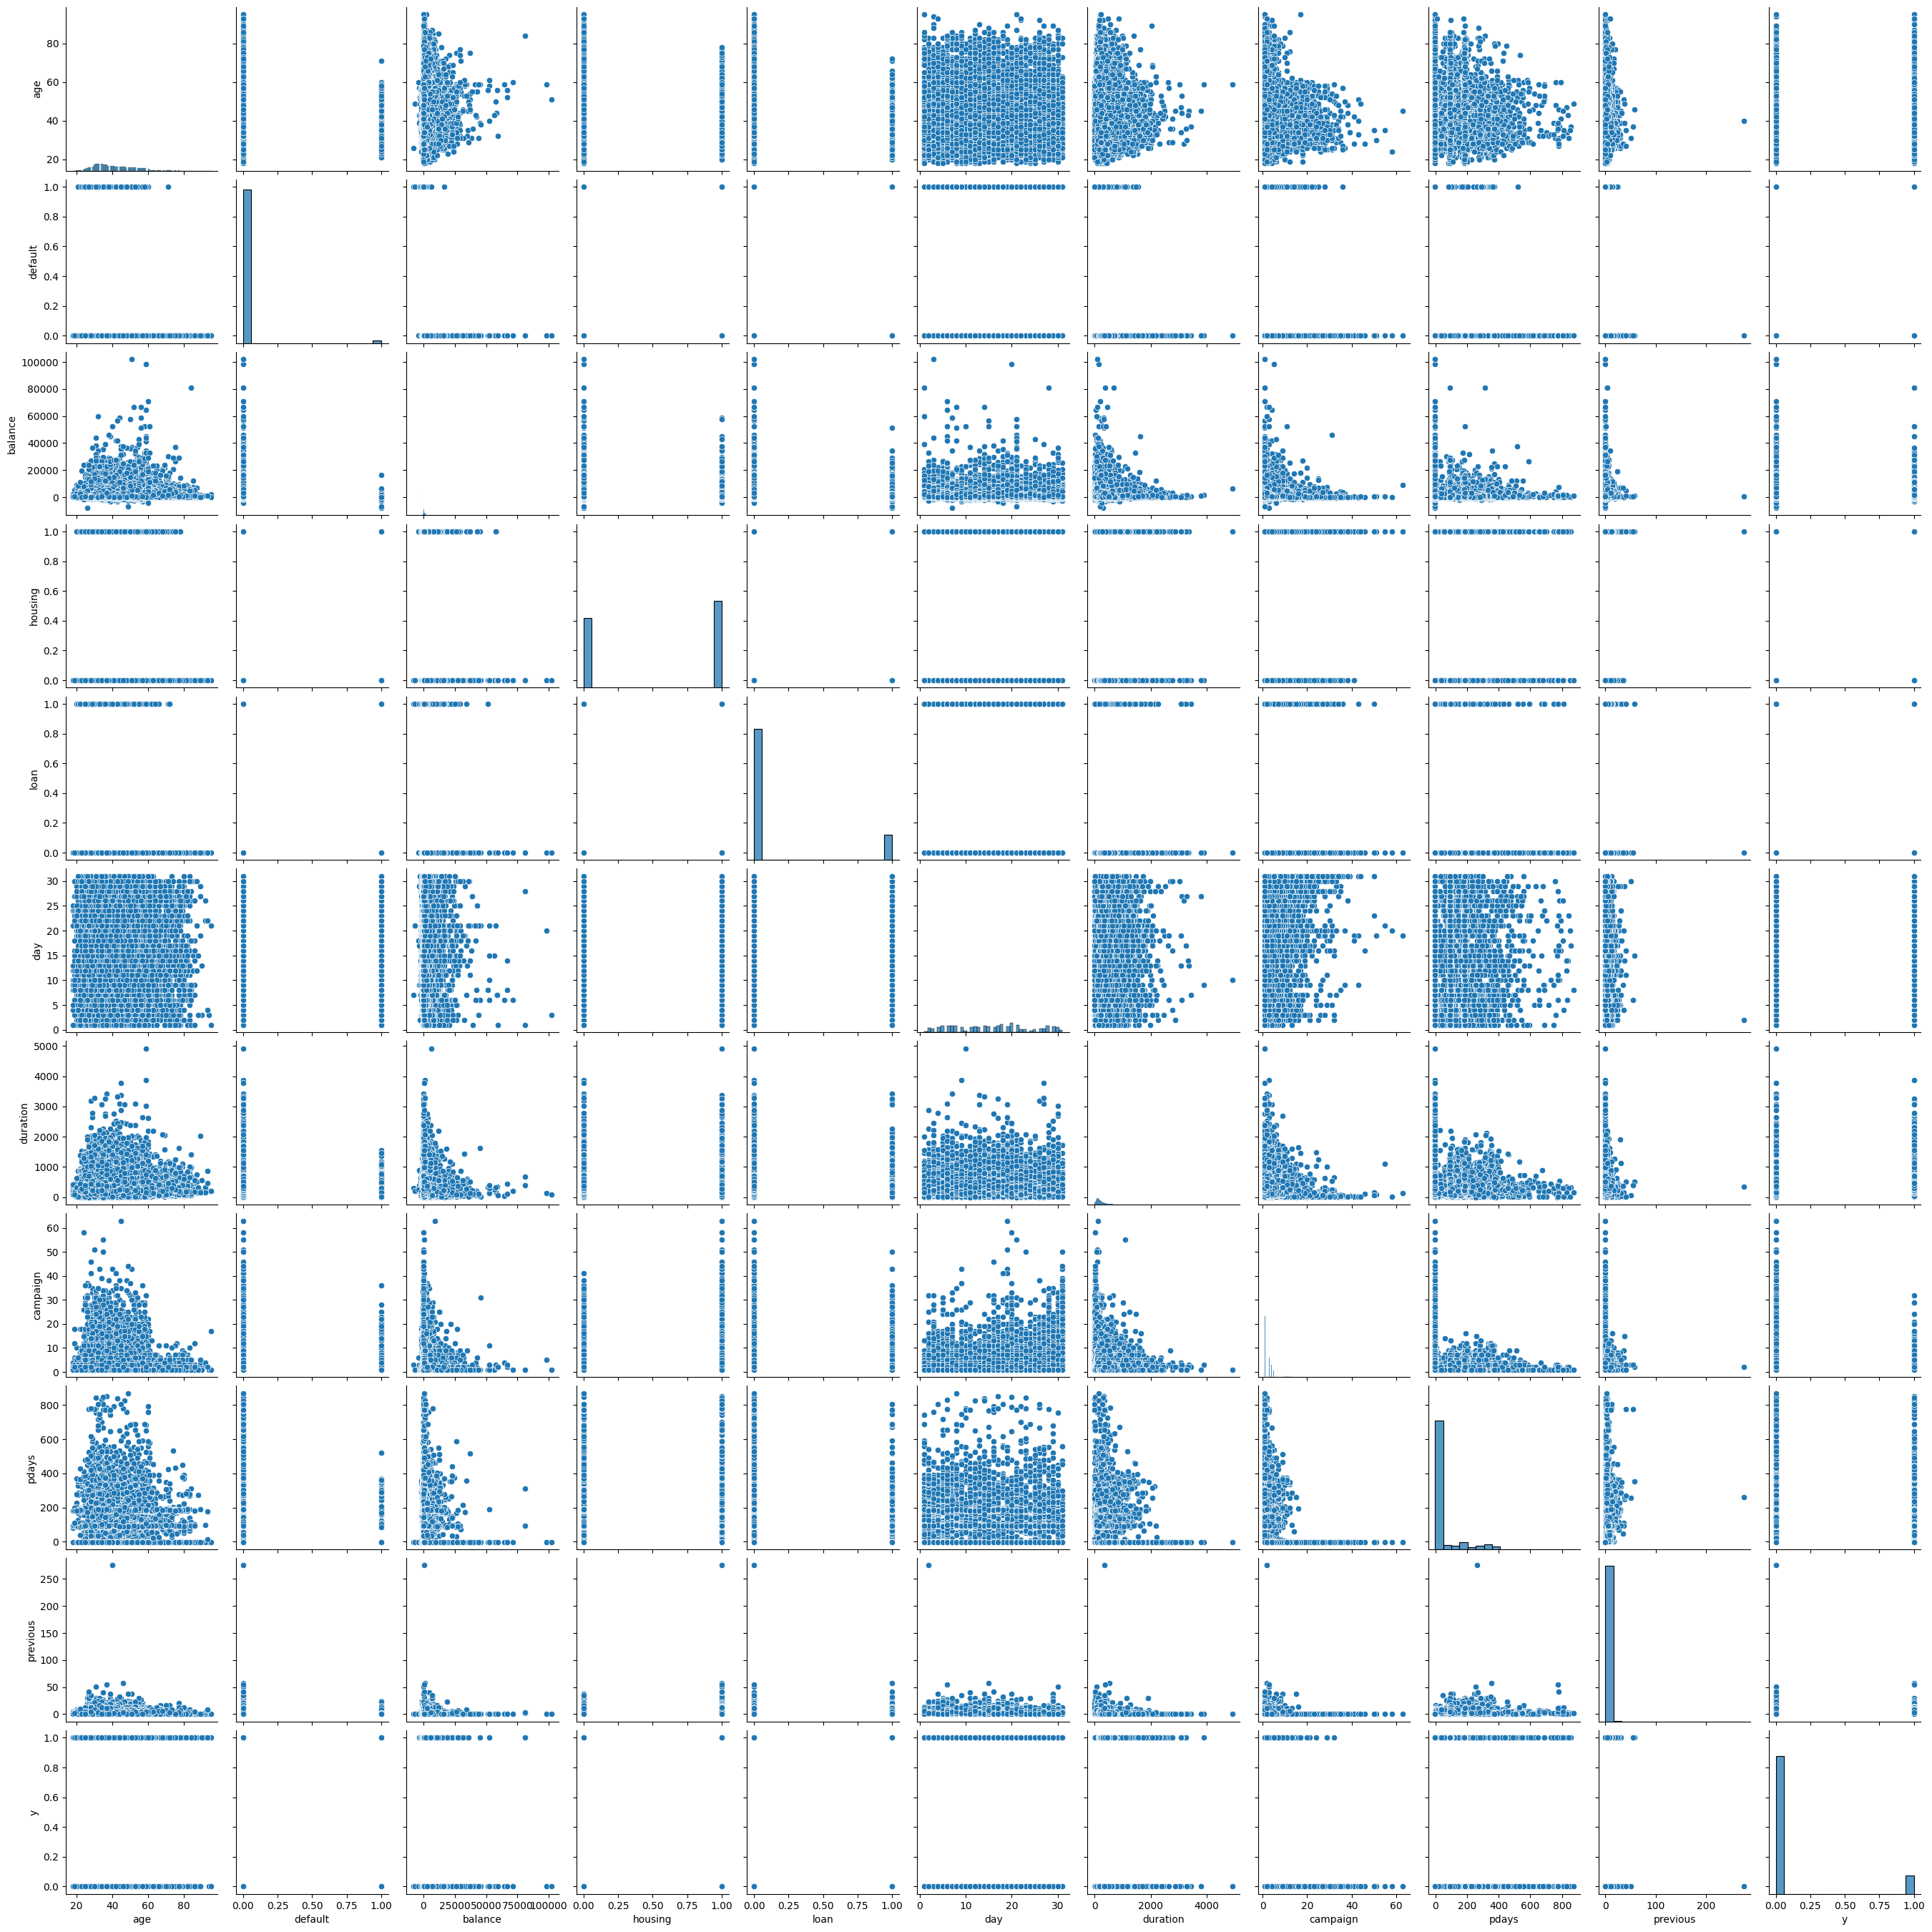

In [14]:
sns.pairplot(df_bank)

Histograms are barely visible on the pair plot, there doesn't seem to be much correlation between features. We can look at the correlation matrix to gain more insight on numerical features and their relations. It seems there is a skew in most features.

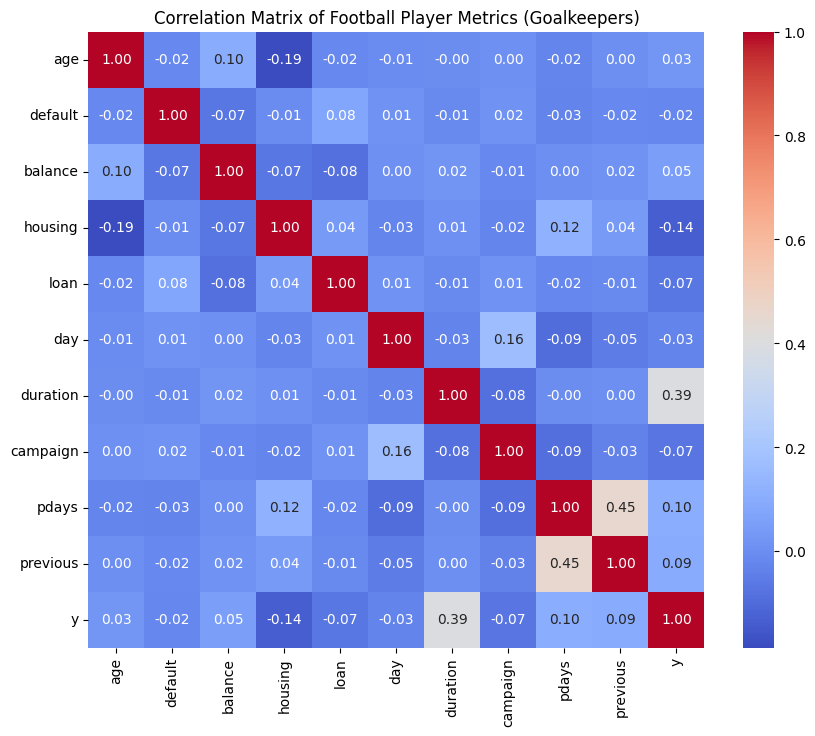

In [15]:
numerical_df = df_bank.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Football Player Metrics (Goalkeepers)')
plt.show()

There isn't much correlation between features and between the response variable. We can try modelling to classify data and test the accuracy. We can try Naive Bayes method but there are much better ways to classify data as normality is important for Naive Bayes. Logistic regression will be much more effective with this data.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
encoder = OneHotEncoder(sparse_output=False)

transformed_data = encoder.fit_transform(
    df_bank[["job", "marital", "education", "contact", "month", "poutcome"]]
)

onehot_df = pd.DataFrame(
    transformed_data,
    columns=encoder.get_feature_names_out(
        ["job", "marital", "education", "contact", "month", "poutcome"]
    ),
)

encoded_df = pd.concat([onehot_df, df_bank], axis=1).drop(
    ["job", "marital", "education", "contact", "month", "poutcome"],
    axis=1,
)

In [18]:
encoded_df.shape

(45211, 49)

One-Hot Encoding introduces many more features which can reduce the accuracy again so some features might be excluded later.

In [19]:
encoded_df = encoded_df.astype(float)

This conversion is done to prevent type related errors. Now we need to scale the features to improve model performance, min-max scaling will be used as the data is not completely normally distributed.

In [22]:
X = encoded_df.drop('y', axis=1)
y = encoded_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [27]:
print('Model accuracy: ', accuracy)

Model accuracy:  0.8988167643481145


An accuracy of almost 90% is very good in most cases. However, the data on hand is highly imbalanced as mentioned before, this might mean that the model is just predicting the majority class most of the time. We can look at other metrics to determine wheter the model is truly good. 

In [35]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [29]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

c:\Users\Ada\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [30]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [31]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.8988167643481145
Precision: 0.6305609284332688
Recall: 0.31047619047619046
F1 Score: 0.41608168474792595
ROC AUC Score: 0.502126861003378


We can also display the confusion matrix.

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

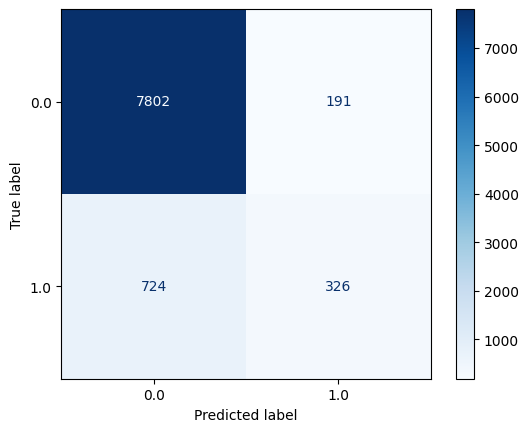

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Overall Interpretation

Precision: The precision indicates that a significant proportion of the positive predictions are correct, but there are still many false positives.

Recall: The recall is quite low, indicating that the model is missing a lot of actual positive instances (high false negative rate).

F1 Score: The F1 score suggests a moderate balance between precision and recall, but the low value indicates room for improvement.

ROC AUC Score: The ROC AUC score close to 0.5 suggests that the model is not performing better than random guessing in terms of distinguishing between classes.

The accuracy being high didn't mean good performance as seen by the other scores. To improve the model further, feature engineering or feature selection could be done on the data. Maybe applying PCA could help use only the features that capture more variation.

In [37]:
from sklearn.naive_bayes import GaussianNB

Now we will try Naive Bayes on the data.

Accuracy: 0.8544730730952118
Precision: 0.40249266862170086
Recall: 0.5228571428571429
F1 Score: 0.45484672742336374
ROC AUC Score: 0.8261160062673888


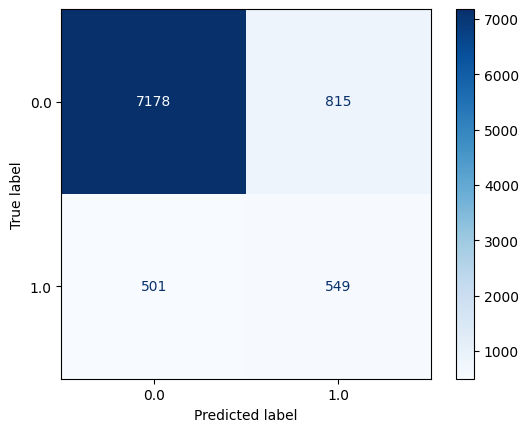

In [38]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The accuracy and precision is lower than Logistic Regression but Recall, F1 Score and ROC AUC Score is much higher. This means that at least the model isn't randomly guessing which might be better in this case. However, due to the imbalance in the data, it is hard to say this with certainty. The previous assumptions about the normality of the data might be incorrect. 